What needs to be done:
- Do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
- Plot bar charts showing impact of employee salaries on retention
- Plot bar charts showing corelation between department and employee retention
- Build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

In [81]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
# Importing data set
data = pd.read_csv('hr_data.csv')
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [83]:
# Diving the data set into people leaving the company and people staying
left = data[data.left == 1]
stayed = data[data.left == 0]

We can calculate the mean of all the columns for people staying in company and leaving. We can then easily check the columns that have more dependency.

In [84]:
# Calculating the mean of all the numerical data so that we can extract useful independent variable
left_mean = left.drop(['Department', 'salary'], axis=1).mean()

stayed_mean = stayed.drop(['Department', 'salary'], axis=1).mean()

In [85]:
left_mean

satisfaction_level         0.440098
last_evaluation            0.718113
number_project             3.855503
average_monthly_hours    207.419210
time_spend_company         3.876505
Work_accident              0.047326
left                       1.000000
promotion_last_5years      0.005321
dtype: float64

In [86]:
stayed_mean

satisfaction_level         0.666810
last_evaluation            0.715473
number_project             3.786664
average_monthly_hours    199.060203
time_spend_company         3.380032
Work_accident              0.175009
left                       0.000000
promotion_last_5years      0.026251
dtype: float64

We can conclude these observations:
1. People having lower `satisfaction_level` are leaving
2. People working `average_monthly_hours` are leaving
3. People having less `promotion_last_5years` are leaving

We can also generate graph to check the correlation of the variable on the dependent variable.

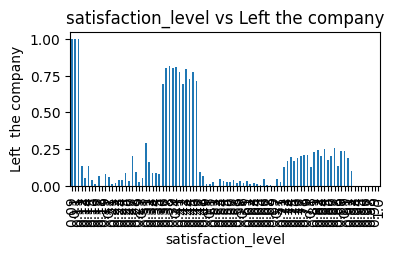

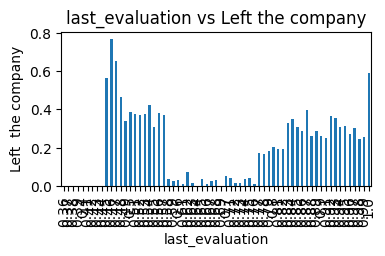

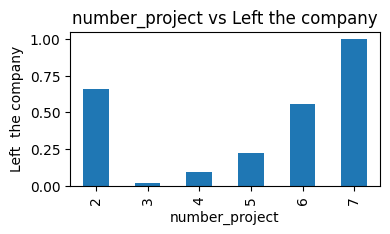

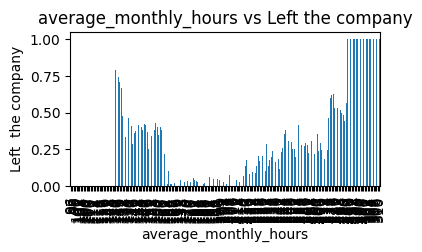

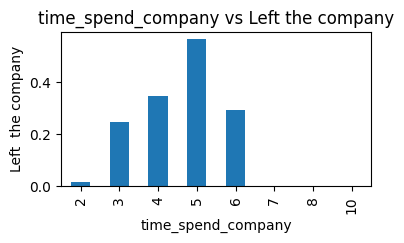

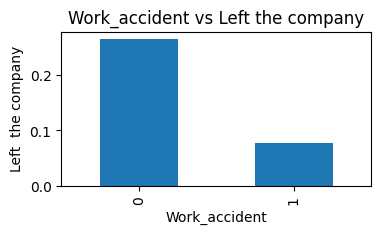

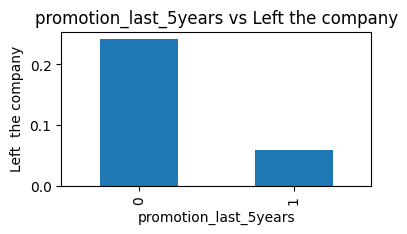

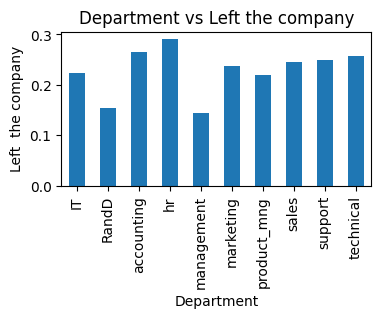

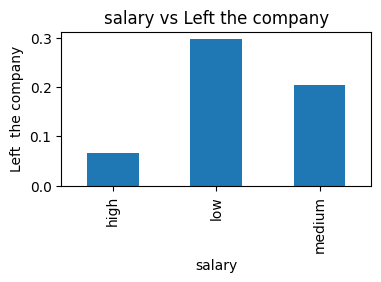

In [87]:
# Getting all column names except 'left'
feature_columns = data.columns[data.columns != 'left']

# Plotting each feature against 'left'
for feature in feature_columns:
    plt.figure(figsize=(4, 2))
    data.groupby(feature)['left'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Left  the company')
    plt.title(f'{feature} vs Left the company')
    plt.show()

We have left the `Department` and `Salary` columns as they were categorical data. So, let us now see their influence over the dependent variable.

We can use the ``pandas.crosstab()`` function. It helps us to understand the relationship between two categorical variables by computing their frequency distribution. It is useful in analyzing how the distribution of one categorical variable varies across different categories of another categorical variable.

<Axes: xlabel='Department'>

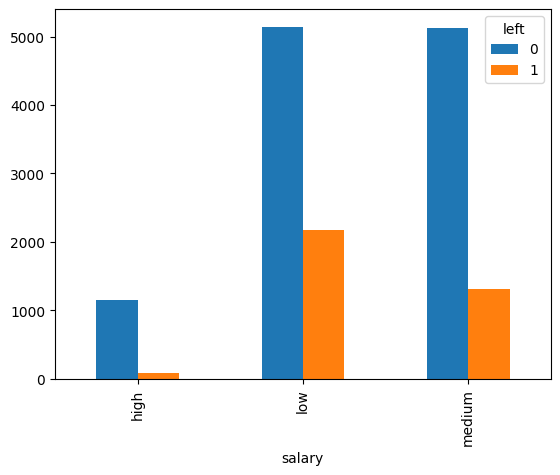

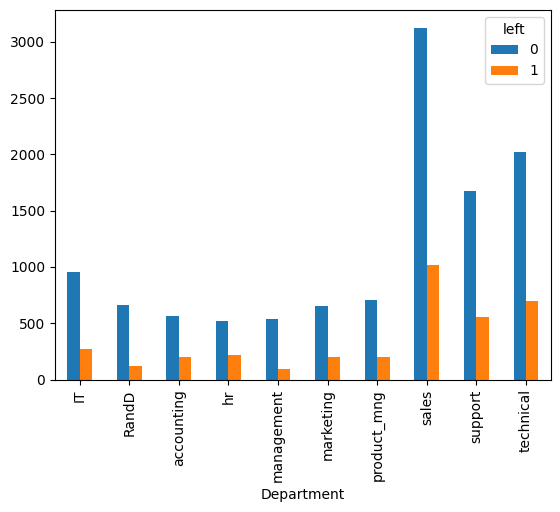

In [88]:
pd.crosstab(data.salary,data.left).plot(kind='bar')
pd.crosstab(data.Department,data.left).plot(kind='bar')

<Axes: xlabel='salary'>

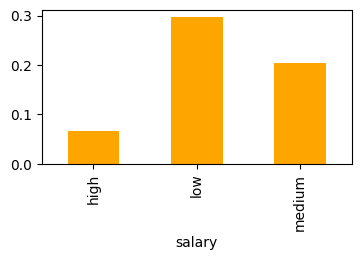

In [89]:
# We can also use group by approach to find the behavior
plt.figure(figsize=(4, 2))
data.groupby('salary')['left'].mean().plot(kind='bar', color='orange')

We can finally conclude that salary has an impact but Department has a limited influence on the people. So, our final independent variables are:
1. **Satisfaction Level**
2. **Average Monthly Hours**
3. **Promotion Last 5 Years**
4. **Salary**

Let us now train our model with these 4 independent variables but first we need to convert the categorical variable `salary` into numeric form

In [90]:
# Converting categorical value into numerical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data.salary = label_encoder.fit_transform(data.salary)
data

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1
14995,0.37,0.48,2,160,3,0,1,0,support,1
14996,0.37,0.53,2,143,3,0,1,0,support,1
14997,0.11,0.96,6,280,4,0,1,0,support,1


In [93]:
# Separating dependent and independent variables
Y = data[['left']]
X = data[['satisfaction_level', 'average_monthly_hours', 'promotion_last_5years', 'salary']]

In [94]:
# Training Logistic Regression model but first splitting training and testing data set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.3)

In [95]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [96]:
model.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [97]:
# Predicting outcome
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [101]:
print(f"Model Score is: {round(model.score(X_test, Y_test)*100, 2)}%")

Model Score is: 77.24%
